In [3]:
import tensorflow as tf 
import matplotlib.pyplot as plt

# 模型构建

## VGG块的构建

In [4]:
def vgg_block(num_conv,num_filters):
    # 序列模型
    blk = tf.keras.models.Sequential()
    # 遍历卷积层
    for _ in range(num_conv):
        # 设置卷积层
        blk.add(tf.keras.layers.Conv2D(num_filters,kernel_size=3,padding='same',activation="relu"))
    # 池化层
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
    return blk

## 构建模型

In [5]:
def vgg(conv_arch):
    # 序列模型
    net = tf.keras.models.Sequential()
    # 生成卷积部分
    for (num_convs,num_filters) in conv_arch:
        net.add(vgg_block(num_convs,num_filters))
    # 全连接层
    net.add(tf.keras.models.Sequential([
        # 展评
        tf.keras.layers.Flatten(),
        # 全连接层
        tf.keras.layers.Dense(4096,activation="relu"),
        # 随机失活
        tf.keras.layers.Dropout(0.5),
        # 全连接层
        tf.keras.layers.Dense(4096,activation="relu"),
        # 随机失活
        tf.keras.layers.Dropout(0.5),
        # 输出层
        tf.keras.layers.Dense(10,activation="softmax")
    ]))
    return net

In [6]:
# 卷积块的参数
conv_arch = ((2,64),(2,128),(3,256),(3,512),(3,512))

In [7]:
net = vgg(conv_arch)

In [8]:
X = tf.random.uniform((1,224,224,1))
y = net(X)
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (1, 112, 112, 64)         37568     
_________________________________________________________________
sequential_2 (Sequential)    (1, 56, 56, 128)          221440    
_________________________________________________________________
sequential_3 (Sequential)    (1, 28, 28, 256)          1475328   
_________________________________________________________________
sequential_4 (Sequential)    (1, 14, 14, 512)          5899776   
_________________________________________________________________
sequential_5 (Sequential)    (1, 7, 7, 512)            7079424   
_________________________________________________________________
sequential_6 (Sequential)    (1, 10)                   119586826 
Total params: 134,300,362
Trainable params: 134,300,362
Non-trainable params: 0
__________________________________________

# 数据读取

In [9]:
import numpy as np
from tensorflow.keras.datasets import mnist
# 获取手写数字数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 训练集数据维度的调整：N H W C
train_images = np.reshape(train_images,(train_images.shape[0],train_images.shape[1],train_images.shape[2],1))
# 测试集数据维度的调整：N H W C
test_images = np.reshape(test_images,(test_images.shape[0],test_images.shape[1],test_images.shape[2],1))

In [10]:
# 定义两个方法随机抽取部分样本演示
# 获取训练集数据
def get_train(size):
    # 随机生成要抽样的样本的索引
    index = np.random.randint(0, np.shape(train_images)[0], size)
    # 将这些数据resize成227*227大小
    resized_images = tf.image.resize_with_pad(train_images[index],224,224,)
    # 返回抽取的
    return resized_images.numpy(), train_labels[index]
# 获取测试集数据 
def get_test(size):
    # 随机生成要抽样的样本的索引
    index = np.random.randint(0, np.shape(test_images)[0], size)
    # 将这些数据resize成224*224大小
    resized_images = tf.image.resize_with_pad(test_images[index],224,224,)
    # 返回抽样的测试样本
    return resized_images.numpy(), test_labels[index]

In [11]:
# 获取训练样本和测试样本
train_images,train_labels = get_train(256)
test_images,test_labels = get_test(128)

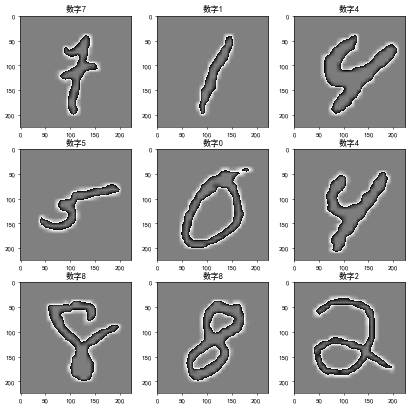

In [12]:
plt.figure(figsize=(10,10), dpi=50)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 数据展示：将数据集的前九个数据集进行展示
for i in range(9):
    plt.subplot(3,3,i+1)
    # 以灰度图显示，不进行插值
    plt.imshow(train_images[i].astype(np.int8).squeeze(), cmap='gray', interpolation='none')
    # 设置图片的标题：对应的类别
    plt.title("数字{}".format(train_labels[i]))

# 模型编译

In [13]:
# 指定优化器，损失函数和评价指标
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)

net.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型训练

In [ ]:
# 模型训练：指定训练数据，batchsize,epoch,验证集
net.fit(train_images,train_labels,batch_size=128,epochs=3,verbose=1,validation_split=0.1)

Epoch 1/3


# 模型评估

In [ ]:
# 指定测试数据
net.evaluate(test_images,test_labels,verbose=1)